In [7]:
import numpy as np
import mlx.core as mx
from matplotlib import pyplot as plt

from spectral_coherence import smoothed_periodograms, coherences
from spectral_coherence.utils import mx_matmul

from data_generation.arma import generate_arma_sample
from data_generation.spectral_density import arma_spectral_density

In [8]:
# generate a time series from an ARMA(1, 1) process
n_samples, n_features = 1000, 3
ar = np.random.uniform(low=-0.8, high=0.8, size=n_features)
ma = np.random.uniform(low=-0.8, high=0.8, size=n_features)
y = generate_arma_sample(n_samples, n_features, ar, ma)
y = mx.array(y)

# define the true spectral density
sd = arma_spectral_density(ar, ma)

# define the frequencies at which to evaluate the spectral density
freqs = mx.linspace(-0.5, 0.5, num=100)

# define the bandwidth of the smoothing kernel
B = 31

# Spectral density

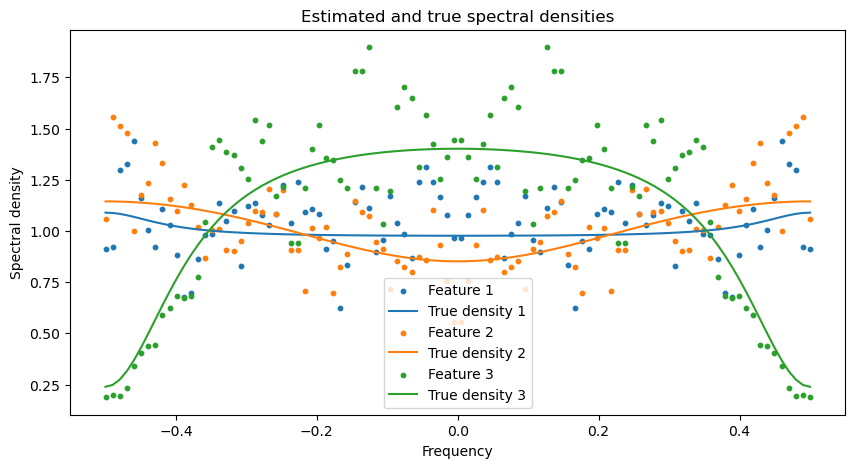

In [9]:
# estimate the spectral density from the sample
S_hats, freqs = smoothed_periodograms(y, B, freqs)

# plot the estimated and true spectral densities
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(n_features):
    ax.scatter(freqs, S_hats[:, i, i], label=f"Feature {i+1}", marker="o", s=10)
    true_density = sd(freqs)[i]
    ax.plot(freqs, true_density, label=f"True density {i+1}")

ax.set_xlabel("Frequency")
ax.set_ylabel("Spectral density")
ax.set_title("Estimated and true spectral densities")
ax.legend()
plt.show()

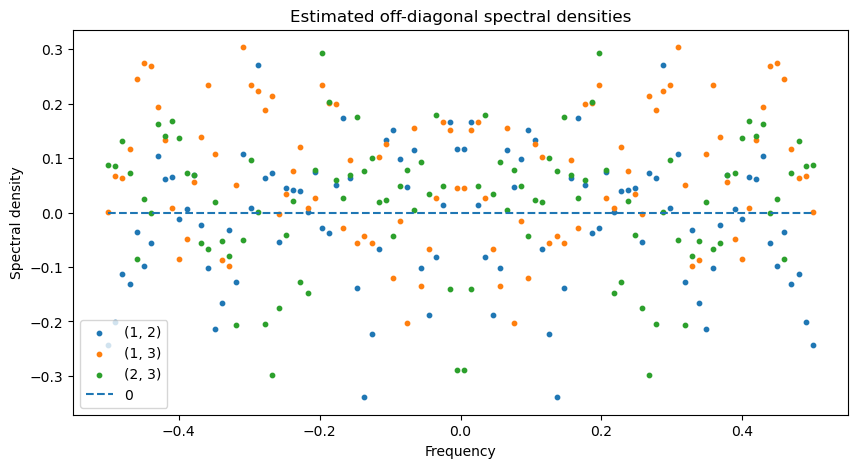

In [10]:
# we also check that the off-diagonal elements of the estimated spectral density are close to 0
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(n_features):
    for j in range(i + 1, n_features):
        ax.scatter(freqs, S_hats[:, i, j], label=f"({i+1}, {j+1})", marker="o", s=10)

# plot a constant 0 line for reference
ax.plot(freqs, np.zeros_like(freqs), label="0", linestyle="--")

ax.set_xlabel("Frequency")
ax.set_ylabel("Spectral density")
ax.set_title("Estimated off-diagonal spectral densities")
ax.legend()
plt.show()

# Coherence

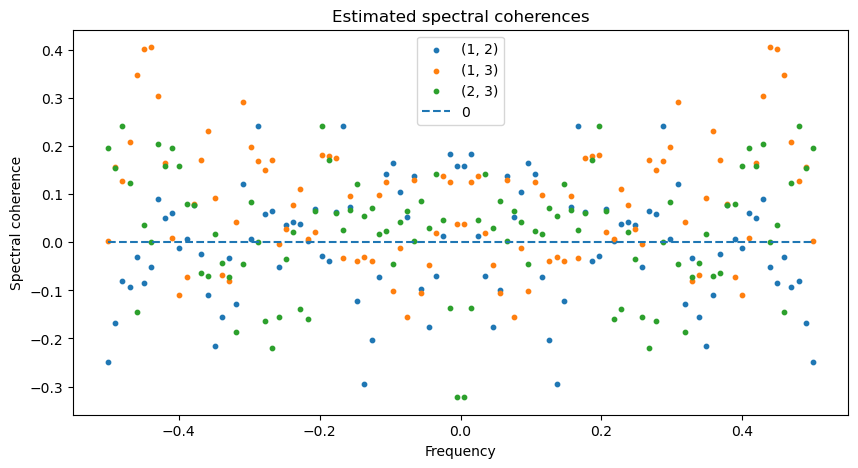

In [11]:
# estimate the spectral coherence from the sample
C_hats, freqs = coherences(y, B, freqs)

# plot the estimated and true spectral coherences
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(min(n_features, 5)):
    for j in range(i + 1, min(n_features, 5)):
        ax.scatter(freqs, C_hats[:, i, j], label=f"({i+1}, {j+1})", marker="o", s=10)

# plot a constant 0 line for reference
ax.plot(freqs, np.zeros_like(freqs), label="0", linestyle="--")

ax.set_xlabel("Frequency")
ax.set_ylabel("Spectral coherence")
ax.set_title("Estimated spectral coherences")
ax.legend()
plt.show()

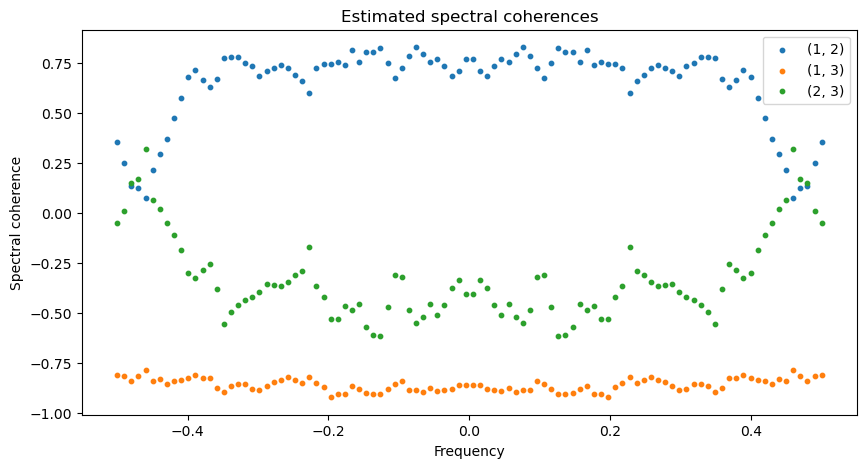

In [12]:
# Rotate the data to introduce spatial dependence
mixing_matrix = mx.random.normal(shape=(n_features, n_features))
y = mx_matmul(y, mixing_matrix)

# estimate the spectral coherence from the sample
C_hats, freqs = coherences(y, B, freqs)

# plot the estimated spectral coherences
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(n_features):
    for j in range(i + 1, n_features):
        ax.scatter(freqs, C_hats[:, i, j], label=f"({i+1}, {j+1})", marker="o", s=10)

ax.set_xlabel("Frequency")
ax.set_ylabel("Spectral coherence")
ax.set_title("Estimated spectral coherences")
ax.legend()
plt.show()